In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [9]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [10]:
print(train.shape)
print(test.shape)

(60000, 785)
(5000, 785)


In [18]:
print(train.value_counts)
print(test.info())

<bound method DataFrame.value_counts of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          0       0       0       0       0       0       0       0       0   
1          1       0       0       0       0       0       0       0       0   
2          2       0       0       0       0       0       0       0       0   
3          3       0       0       0       0       0       0       0       0   
4          4       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      5       0       0       0       0       0       0       0       0   
59996      6       0       0       0       0       0       0       0       0   
59997      7       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      9       0       0       0       0       0       0       0       0   


In [20]:
y = train['label']
train.drop('label', inplace=True, axis='columns')
test.drop('id', inplace=True, axis='columns')

In [21]:
train.iloc[2, :].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  76, 255, 255,  76,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 125, 179, 201, 255,
       255, 201,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 128,
       128, 128, 128, 217, 128,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

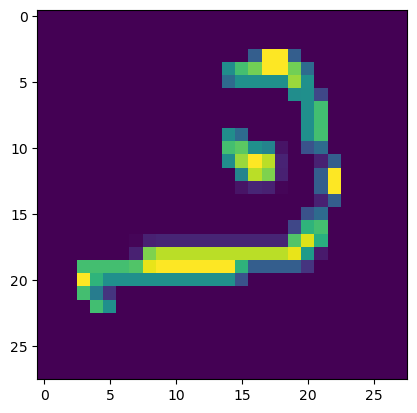

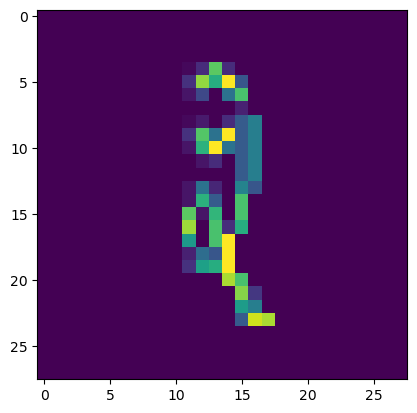

In [23]:
sample1 = np.reshape(train.iloc[2, :].values, (28, 28))
sample2 = np.reshape(train.iloc[3, :].values, (28, 28))
plt.imshow(sample1)
plt.show()
plt.imshow(sample2)
plt.show()

In [24]:
X = train.values.reshape(-1, 28, 28, 1)
print(X.shape)

(60000, 28, 28, 1)


In [25]:
X_test = test.values.reshape(-1, 28, 28, 1)

X = X / 255
X_test = X_test / 255

X = np.expand_dims(X, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [29]:
def CNN_model(input_shape=(28, 28, 1)):
    model = tf.keras.Sequential(layers=[tf.keras.layers.Input(shape=input_shape),
                                        tf.keras.layers.Conv2D(32, 3, activation='relu', data_format='channels_last'),
                                        tf.keras.layers.Conv2D(32, 3, activation='relu', data_format='channels_last'),
                                        tf.keras.layers.MaxPooling2D(),
                                        tf.keras.layers.Dropout(0.25),
                                        tf.keras.layers.Conv2D(32, 3, activation='relu', data_format='channels_last'),
                                        tf.keras.layers.Conv2D(32, 3, activation='relu', data_format='channels_last'),
                                        tf.keras.layers.MaxPooling2D(),
                                        tf.keras.layers.Dropout(0.25),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(32, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        tf.keras.layers.Dense(128, activation='relu'),
                                        tf.keras.layers.Dense(10, activation='softmax'),
                                        ])
    model.build()
    model.summary()
    return model

In [30]:
model = CNN_model()

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy', metrics=['acc'])

callbacks = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=5, min_lr=1e-3)

hist = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=20, callbacks=[callbacks])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,202 (219.54 KB)

 Trainable params: 56,202 (219.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - acc: 0.8335 - loss: 0.4816 - val_acc: 0.9886 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - acc: 0.9809 - loss: 0.0638 - val_acc: 0.9905 - val_loss: 0.0331 - learning_rate: 0.0010
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - acc: 0.9859 - loss: 0.0506 - val_acc: 0.9926 - val_loss: 0.0252 - learning_rate: 0.0010
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - acc: 0.9870 - loss: 0.0438 - val_acc: 0.9921 - val_loss: 0.0260 - learning_rate: 0.0010
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - acc: 0.9893 - loss: 0.0347 - val_acc: 0.9943 - val_loss: 0.0188 - learning_rate: 0.0010
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - acc: 0.9905 - loss: 0.0304 - val_acc: 0.9932 - val_loss: 0.0218 - learning_rate: 0.0010
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - acc: 0.9932 - loss: 0.0232 - val_acc: 0.9946 - val_loss: 0.0214 - 

In [31]:
pred = model.predict(X_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [39]:
result = np.argmax(pred, axis=1)

In [40]:
results = pd.Series(result, name="Label")
submission = pd.concat([pd.Series(range(1, X_test.shape[0] + 1), name="id"), results], axis=1)
submission.to_csv("submission.csv", index=False)